## 使用信息熵寻找最优划分

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn import datasets

iris =datasets.load_iris()
x=iris.data[:,2:]
y=iris.target

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_clf =DecisionTreeClassifier(max_depth=3,criterion="entropy")
dt_clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
def plot_decision_boundary(model, axis):  
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    x0, x1 = np.meshgrid(
    # 随机两组数，起始值和密度由坐标轴的起始值决定
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(x_new)
    
    zz=y_predict.reshape(x0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap (['#EF9A9A','#FFF59D','#90CAF9'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap) 
    

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


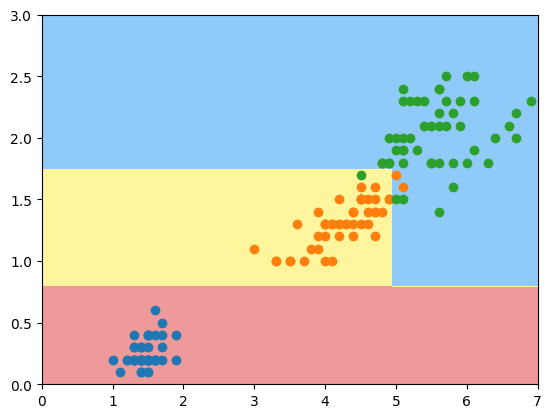

In [25]:
# 绘制决策边界
plot_decision_boundary(dt_clf, axis=[0, 7, 0, 3])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.show()

# **可视化决策树**

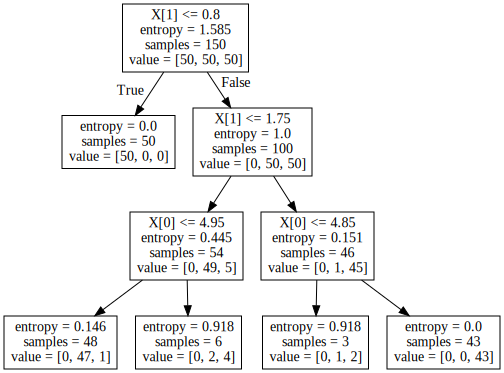

In [26]:
from sklearn.tree import export_graphviz
### 可视化决策树
export_graphviz(dt_clf,out_file="my_iris_tree.dot")
import graphviz
with open("my_iris_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


## 基尼系数

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from sklearn import datasets


iris =datasets.load_iris()
x=iris.data[:,2:]
y=iris.target

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_clf =DecisionTreeClassifier(max_depth=2,criterion="gini")
dt_clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
def plot_decision_boundary(model, axis):  
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    x0, x1 = np.meshgrid(
    # 随机两组数，起始值和密度由坐标轴的起始值决定
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(x_new)
    
    zz=y_predict.reshape(x0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap (['#EF9A9A','#FFF59D','#90CAF9'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap) 

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


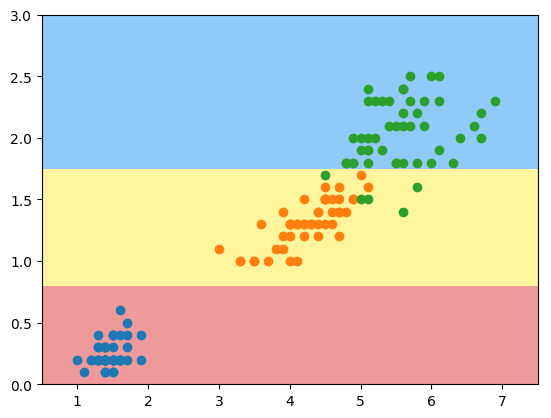

In [31]:
# 绘制决策边界
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.show()

## 模拟使用基尼系数波士顿

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from sklearn import datasets
boston =datasets.load_boston()
x=boston.data
y=boston.target

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

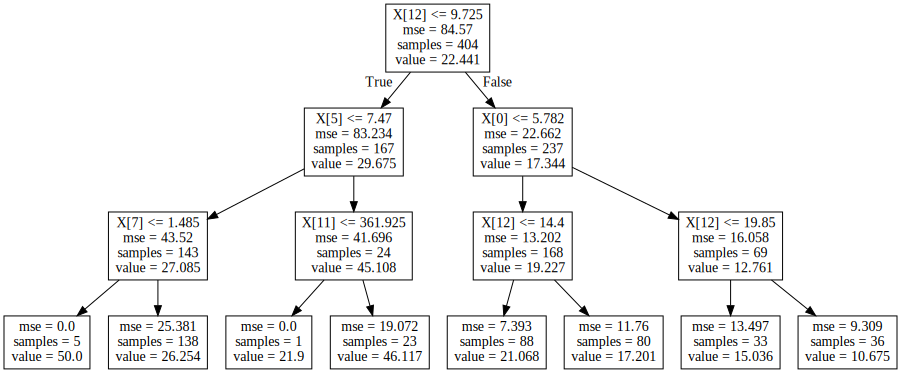

In [36]:
from sklearn.tree import export_graphviz
### 可视化决策树
export_graphviz(dt_reg,out_file="my_boston_tree.dot")
import graphviz
with open("my_boston_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))